##1 - Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Hana

Batch : RMT 035

Objective : Menurut laporan FIFA 2022, jumlah pemain sepak bola pada tahun 2022 kurang lebih sebanyak 100.000 pemain. Namun, dalam dataset ini yang digunakan hanya mencakup 20.000 pemain saja. Project ini bertujuan untuk memprediksi rating pemain FIFA 2023 sehingga semua pemain sepak bola profesional dapat diketahui rating nya dan tidak menutup kemungkinan akan lagir wonderkid baru. Project ini akan dibuat menggunakan algoritma Linear Regresison dan dievaluasi dengan metrics MAE sebagai pertimbangan.

## 2 - Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3 - Data Loading

>Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D1PM%20-%20Machine%20Learning%20Problem%20Framing.csv')
data

,Name,Age,Height,Weight,ValueEUR,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Overall
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [61]:
data.columns

Index(['Name', 'Age', 'Height', 'Weight', 'ValueEUR', 'AttackingWorkRate',
       'DefensiveWorkRate', 'PaceTotal', 'ShootingTotal', 'PassingTotal',
       'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal', 'Overall'],
      dtype='object')

In [3]:
data.duplicated().sum()

104

Drop data duplikat bila tidak menambah informasi baru atau mengganggu model.

Pertahankan data duplikat bila data mewakili bias atau distribusi penting di dunia nyata. Misal memang ada data transaksi yang memang melakukan pembelian yg sama.

In [4]:
#Duplicated Dataset

df = data.copy()

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

0

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
#Rename columns (ga wajib)

df.rename(columns = {'ValueEUR' : 'Price', 'Overall' : 'Rating'}, inplace = True)
df

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19151,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19152,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19153,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19154,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [9]:
#check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19156 entries, 0 to 19155
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               19156 non-null  object
 1   Age                19156 non-null  int64 
 2   Height             19156 non-null  int64 
 3   Weight             19156 non-null  int64 
 4   Price              19156 non-null  int64 
 5   AttackingWorkRate  19156 non-null  object
 6   DefensiveWorkRate  19156 non-null  object
 7   PaceTotal          19156 non-null  int64 
 8   ShootingTotal      19156 non-null  int64 
 9   PassingTotal       19156 non-null  int64 
 10  DribblingTotal     19156 non-null  int64 
 11  DefendingTotal     19156 non-null  int64 
 12  PhysicalityTotal   19156 non-null  int64 
 13  Rating             19156 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 2.0+ MB


- Pada dataset ini terdapat 14 kolom, dimana masing-masing data terdiri dari 3 kolom bertipe object dan 11 kolom bertipe integer.
- Tidak terlihat adanya missing value dari data entries pada masing-masing kolom.
- Data sudah bersih dari data duplikat.

In [10]:
#cek statistik sederhana pada dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,19260.0,2.518468e+01,4.737340e+00,16.0,21.0,25.0,29.0,54.0
Height,19260.0,1.813050e+02,6.866151e+00,155.0,176.0,181.0,186.0,206.0
Weight,19260.0,7.495078e+01,7.066864e+00,49.0,70.0,75.0,80.0,110.0
ValueEUR,19260.0,2.857652e+06,7.604532e+06,0.0,475000.0,975000.0,2000000.0,194000000.0
PaceTotal,19260.0,6.791023e+01,1.065645e+01,28.0,62.0,68.0,75.0,97.0
ShootingTotal,19260.0,5.353551e+01,1.381348e+01,18.0,44.0,56.0,64.0,94.0
PassingTotal,19260.0,5.785332e+01,9.835494e+00,25.0,52.0,58.0,65.0,93.0
DribblingTotal,19260.0,6.302871e+01,9.704853e+00,26.0,58.0,64.0,69.0,95.0
DefendingTotal,19260.0,5.005810e+01,1.638880e+01,14.0,35.0,54.0,63.0,91.0
PhysicalityTotal,19260.0,6.467658e+01,9.626269e+00,29.0,58.0,66.0,72.0,92.0


- Pada dataset ini umur pemain berkisar 16 - 54 tahun dengan rata-rata 25 taun.
- Tinggi rata-rata orang asia berkisar 155-206 cm, terlihat dari rata-rata tinggi badan pemain di dataset ini 181cm. Bisa dibilang bahwa tidak banyak pemain dari Asia.

## 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya. Jawab pertanyaan mengenai EDA yang telah ditentukan pada bagian ini. Anda juga dipersilakan melakukan eksplorasi lain mengenai EDA diluar dari pertanyaan yang diberikan diatas.

Akan dilihat perseberan rating pada dataset ini untuk melihat distribusi target dan juga akan dilihat proporsi tinggi badan dan berat badan pemain untuk melihat apakah pemain memiliki profile yang ideal.

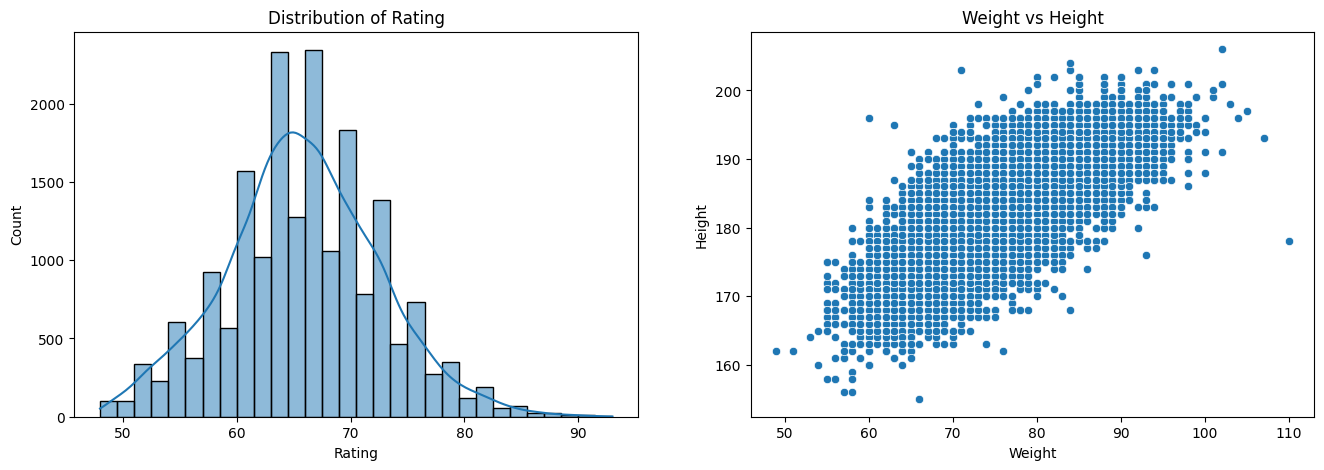

In [11]:
#Create Histogram and Scatter plot for exploration

plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.histplot(df['Rating'], kde = True, bins = 30)
plt.title('Distribution of Rating')

plt.subplot(1,2,2)
sns.scatterplot(x = 'Weight', y = 'Height', data = data)
plt.title('Weight vs Height')
plt.show()

In [12]:
df["Rating"].skew()

0.11746598510376116

Terlihat dari histogram, Rating terdistribusi normal dengan rata-rata di sekitar 65.

Tinggi dan berat badan pemain mempunyai korelasi yang positif, semakin besar tinggi badan pemain makan berat badan pemain juga semakin besar. Sehingga bisa dibilang bahwa pemain sepak bola pada dataset ini proporsional.

## 5 - Feature Engineering

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-set dan test-set, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### Handling Cardinality

In [13]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include='object').columns)

# cat_cols = ["...", "..."]

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,Name,18058,"[L. Messi, R. Lewandowski, Cristiano Ronaldo, K. Mbappé, J. Oblak, K. De Bruyne, Neymar Jr, N. Kanté, H. Kane, M. ter Stegen, M. Neuer, H. Son, Casemiro, K. Benzema, T. Courtois, S. Mané, V. van Dijk, G. Donnarumma, M. Salah, Ederson, J. Kimmich, Alisson, R. Lukaku, Sergio Ramos, L. Suárez, T. Kroos, E. Haaland, K. Navas, Bruno Fernandes, R. Sterling, M. Verratti, L. Modrić, A. Di María, W. Szczęsny, T. Müller, C. Immobile, P. Pogba, L. Goretzka, Marquinhos, P. Dybala, A. Robertson, F. de Jong, T. Alexander-Arnold, Rúben Dias, S. Agüero, H. Lloris, J. Sancho, K. Koulibaly, M. Škriniar, R. Varane, L. Insigne, K. Casteels, Parejo, Sergio Busquets, Thiago, Jordi Alba, M. Hummels, G. Chiellini, S. Handanovič, Rodri, Marcos Llorente, R. Mahrez, Gerard Moreno, J. Vardy, João Cancelo, A. Laporte, K. Coman, Bernardo Silva, Fabinho, Roberto Firmino, A. Griezmann, E. Hazard, P. Gulácsi, E. Cavani, Y. Sommer, David Silva, M. Depay, K. Schmeichel, A. Gómez, I. Gündoğan, M. Reus, L. Bonucci, K. Walker, P. Aubameyang, Koke, Thiago Silva, S. Gnabry, S. de Vrij, M. de Ligt, A. Hakimi, M. Rashford, L. Martínez, Oyarzabal, W. Ndidi, S. Milinković-Savić, Jorginho, Carvajal, L. Digne, D. Alaba, Luis Alberto, ...]"
1,AttackingWorkRate,3,"[Medium, High, Low]"
2,DefensiveWorkRate,3,"[Low, Medium, High]"


### Split Betweet X (Features) and Y (target)

In [14]:
#Splitting antara X dan y

X = df.drop(['Rating'], axis=1) # features
y = df['Rating'] # target

In [15]:
X.head(2)

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82


In [16]:
y.head(2)

0    93
1    92
Name: Rating, dtype: int64

### Splitting between Train Set and Test set

In [17]:
#Splitting training & testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 12)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (17240, 13)
Test Size (1916, 13)


### Handling Outliers

In [18]:
num_cols = list(X_train.select_dtypes(exclude='object').columns)
num_cols

['Age',
 'Height',
 'Weight',
 'Price',
 'PaceTotal',
 'ShootingTotal',
 'PassingTotal',
 'DribblingTotal',
 'DefendingTotal',
 'PhysicalityTotal']

In [19]:
#check distribution form skewness
listItem= []

for col in num_cols:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'normal','skewed')])



skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness


,nama kolom,nilai skewness,distribution
0,Age,0.4,normal
1,Height,-0.0,normal
2,Weight,0.3,normal
3,Price,8.4,skewed
4,PaceTotal,-0.5,normal
5,ShootingTotal,-0.4,normal
6,PassingTotal,-0.2,normal
7,DribblingTotal,-0.5,normal
8,DefendingTotal,-0.3,normal
9,PhysicalityTotal,-0.4,normal


Semua data terdistribusi normal kecuali kolom `Price`. Selanjutnya, akan dilihat batas atas dan batas bawah dan presentase outlier pada masing-masing kolom.


In [20]:
# Get upper, lower boundaries and percentage of outliers

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]
  #checking upper and lower boundary
  if skewness['distribution'][row] == 'skewed':
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    #round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,Age,39.45,10.94,0.13
1,Height,201.86,160.68,0.13
2,Weight,96.13,53.78,0.26
3,Price,6575000.00,-4100000.00,7.56
4,PaceTotal,99.85,35.93,1.02
5,ShootingTotal,94.85,12.06,0.00
6,PassingTotal,87.20,28.35,0.23
7,DribblingTotal,91.98,33.92,0.52
8,DefendingTotal,99.03,0.94,0.00
9,PhysicalityTotal,93.44,35.80,0.19


In [21]:
print(X_train['Price'].min())
q1 = X_train['Price'].quantile(0.25)
q3 = X_train['Price'].quantile(0.75)
iqr = q3 - q1
print(f"IQR {iqr}")
lower = q1 - 3 * iqr
print(f"lower boundary = {lower}")

0
IQR 1525000.0
lower boundary = -4100000.0


In [22]:
X_train[X_train['Price'] < 0]

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal


In [23]:
#compare with column stats
X_train.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,17240.0,25.19,4.75,16.0,21.0,25.0,29.0,54.0
Height,17240.0,181.27,6.86,155.0,176.0,181.0,186.0,206.0
Weight,17240.0,74.95,7.06,49.0,70.0,75.0,80.0,110.0
Price,17240.0,2768599.42,7482014.75,0.0,475000.0,950000.0,2000000.0,194000000.0
PaceTotal,17240.0,67.89,10.65,28.0,62.0,68.0,75.0,97.0
ShootingTotal,17240.0,53.45,13.80,18.0,44.0,56.0,64.0,94.0
PassingTotal,17240.0,57.77,9.81,25.0,51.0,58.0,64.0,93.0
DribblingTotal,17240.0,62.95,9.68,26.0,58.0,64.0,69.0,92.0
DefendingTotal,17240.0,49.99,16.35,14.0,35.0,54.0,63.0,91.0
PhysicalityTotal,17240.0,64.62,9.61,31.0,58.0,66.0,72.0,92.0


Terlihat dari presnetase outlier hanya kolom price yang memiliki presentase lebih dari 5%. Terlihat dari data minimum dan maximum price, paling kecil bernilai 0 sehingga terlihat 8% merupakan nilai di atas upper boundary. Nilai Maksimum pada price sangat jauh dari rata-rata sehingga kemungkinan besar outlier akan berpengaruh terhadap model. Jadi akan di handle outliers nya. Trimming bukan menjadi pilihan karena presentase outlier cukup besar sehingga capping(winsorizing) akan dilakukan.


---


**Trimming Outliers**

Bisa dilakukan ketika perbandingan antara upper boundary, lower boundary, nilai minimum, dan nilai maksimum value pada kolom tersebut kurang meyakinkan. Misal ada umur 0 tahun.

**Retaining Outliers**

Bisa dilakukan ketika perbandingan antara upper boundary, lower boundary, nilai minimum, dan nilai maksimum value pada kolom tersebut masih make sense dan tidak terlalu jauh dari mean value nya. Seperti pace masih di range 0 - 100.

**Capping(Winsorizing)**

Cara terakhir bila keduanya tidak masuk kriteria.

In [24]:
!pip install feature_engine==1.8.3

In [25]:
from feature_engine.outliers import Winsorizer

winsoriser = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables=['Price'],
                            missing_values='ignore')

X_train_capped = winsoriser.fit_transform(X_train)

X_test_capped = winsoriser.transform(X_test)

In [26]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Age - Before Capping


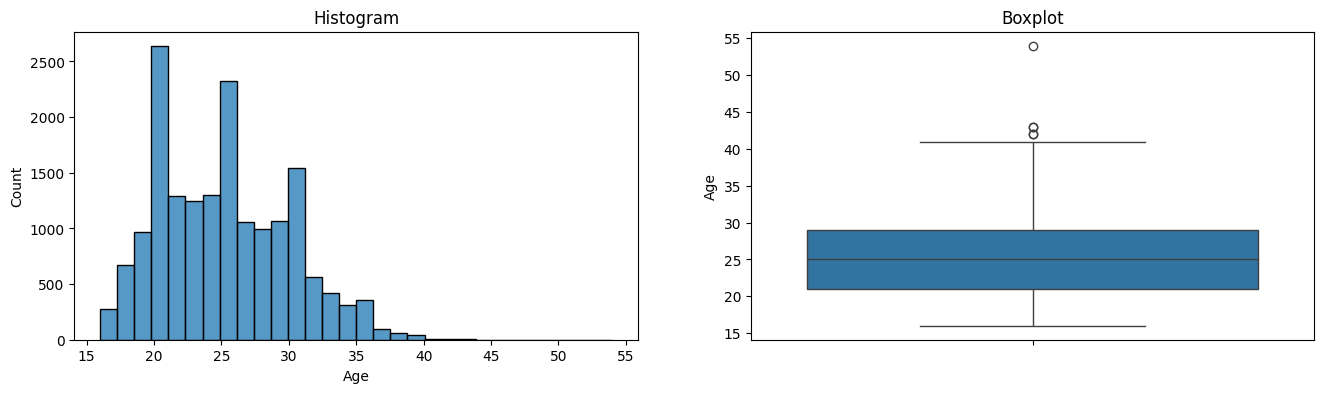


Age - After Capping


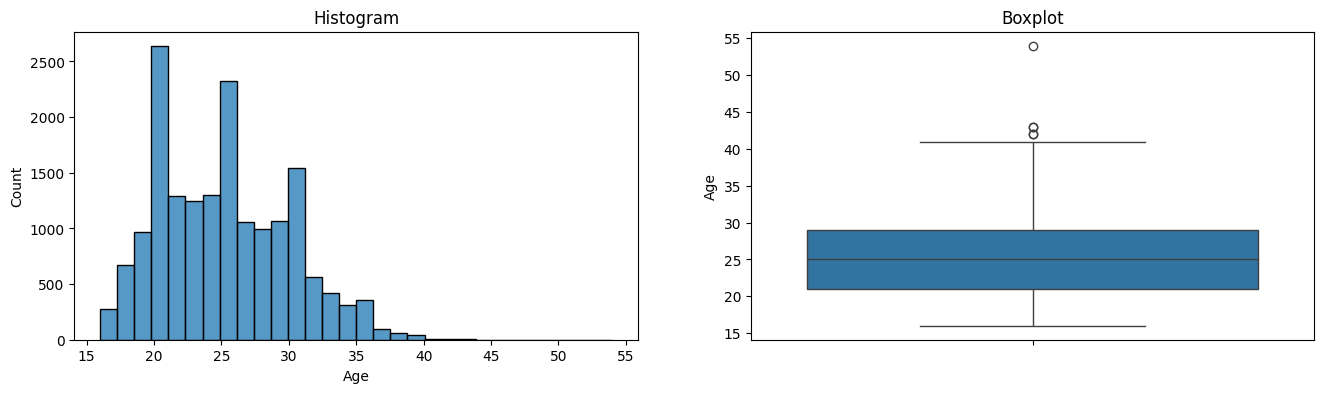

Height - Before Capping


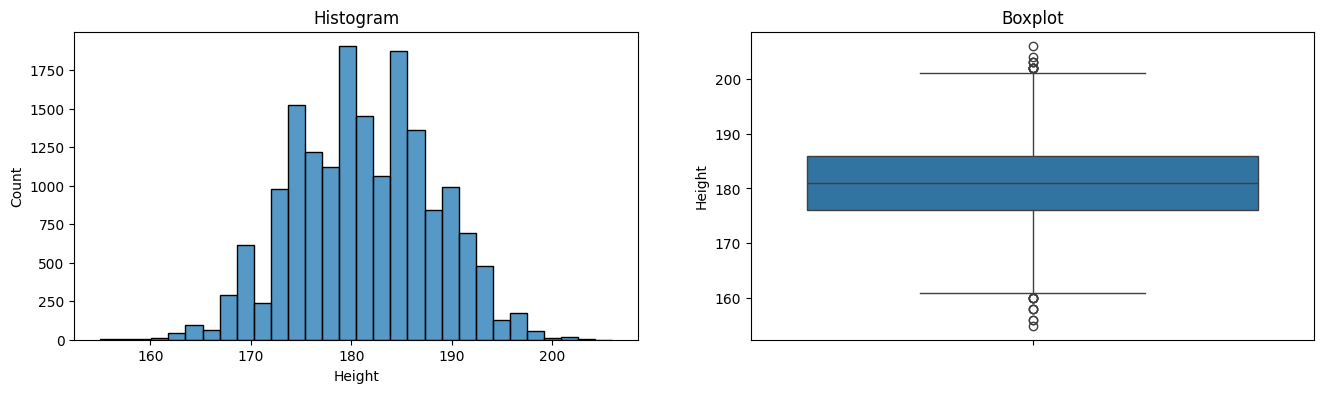


Height - After Capping


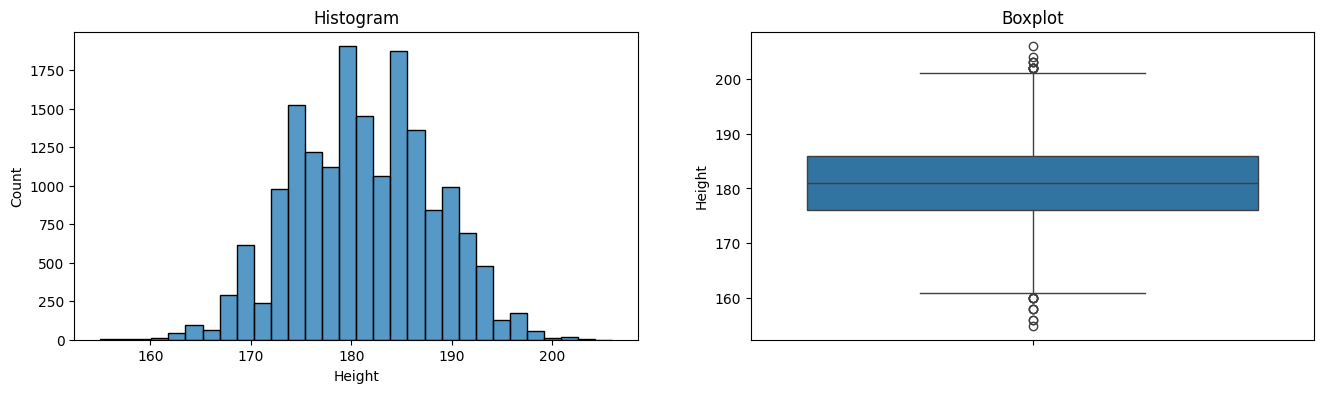

Weight - Before Capping


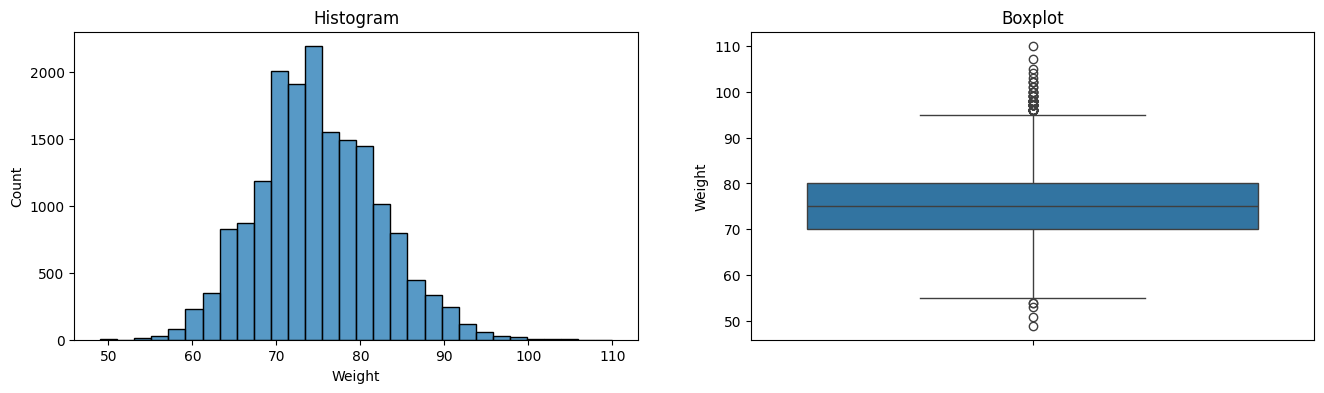


Weight - After Capping


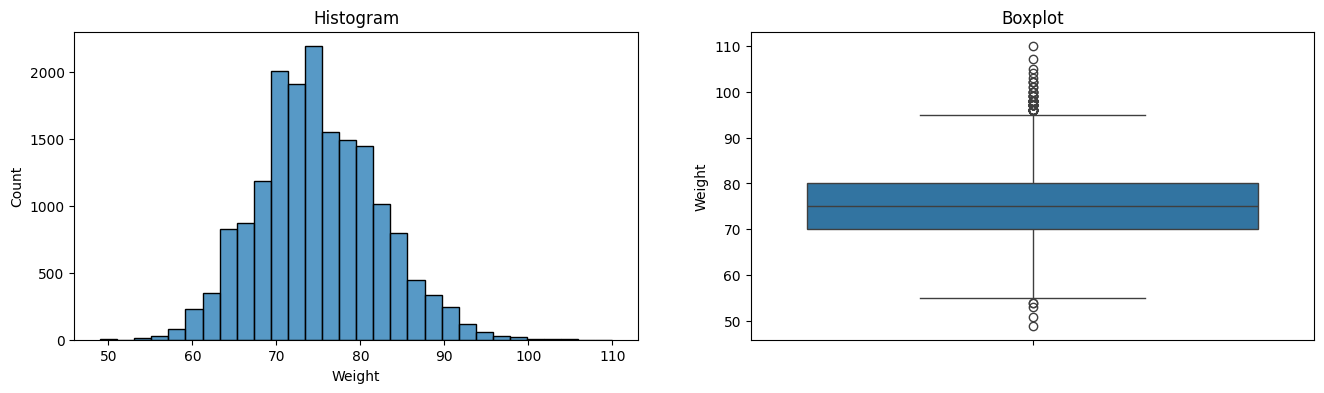

Price - Before Capping


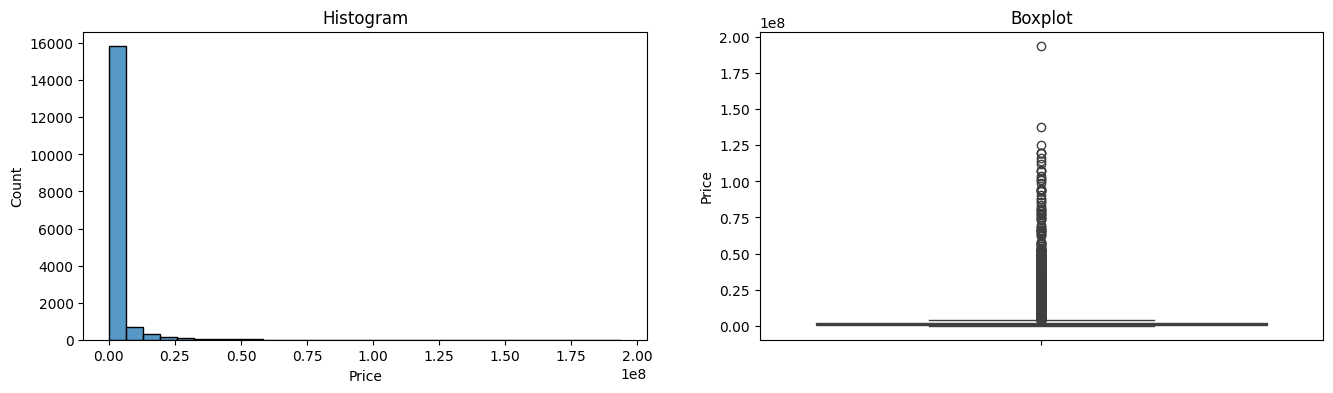


Price - After Capping


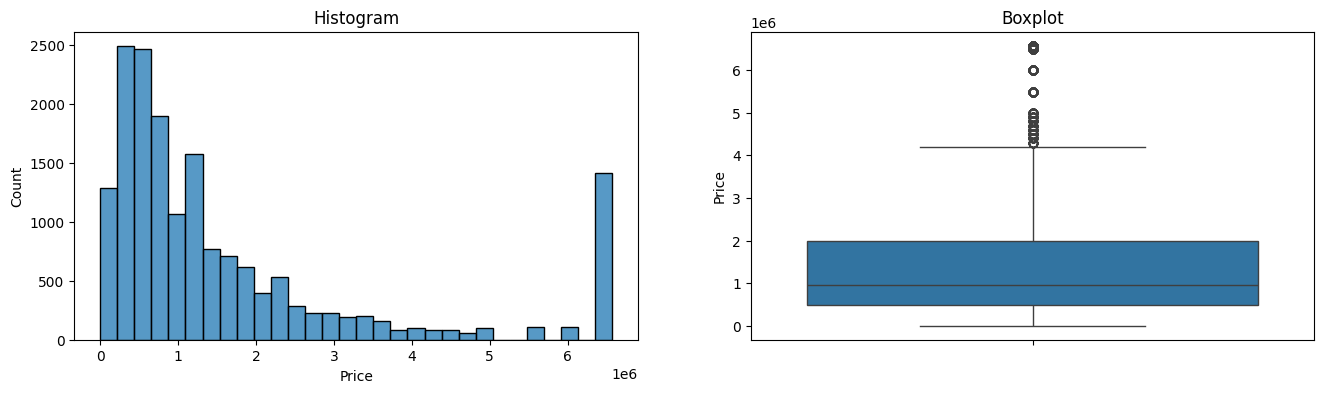

PaceTotal - Before Capping


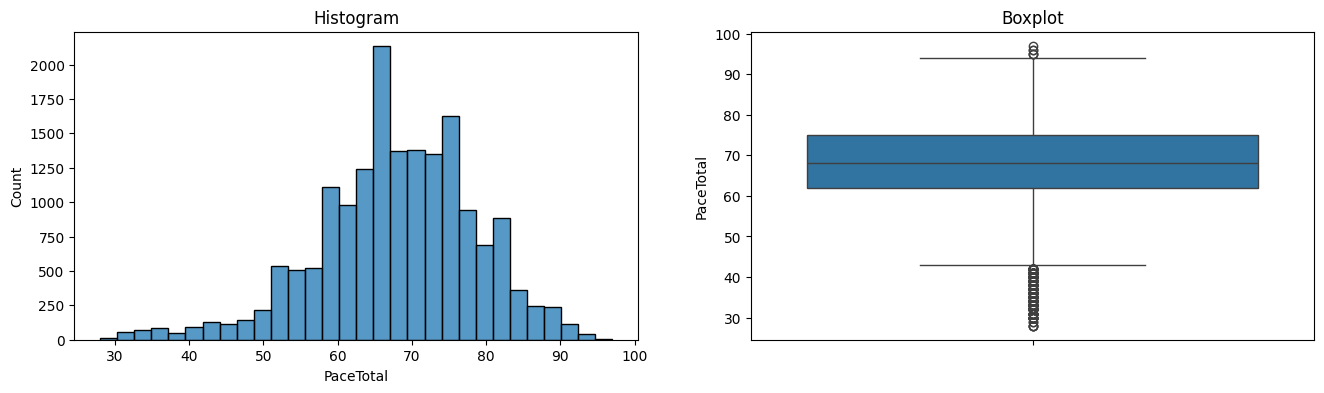


PaceTotal - After Capping


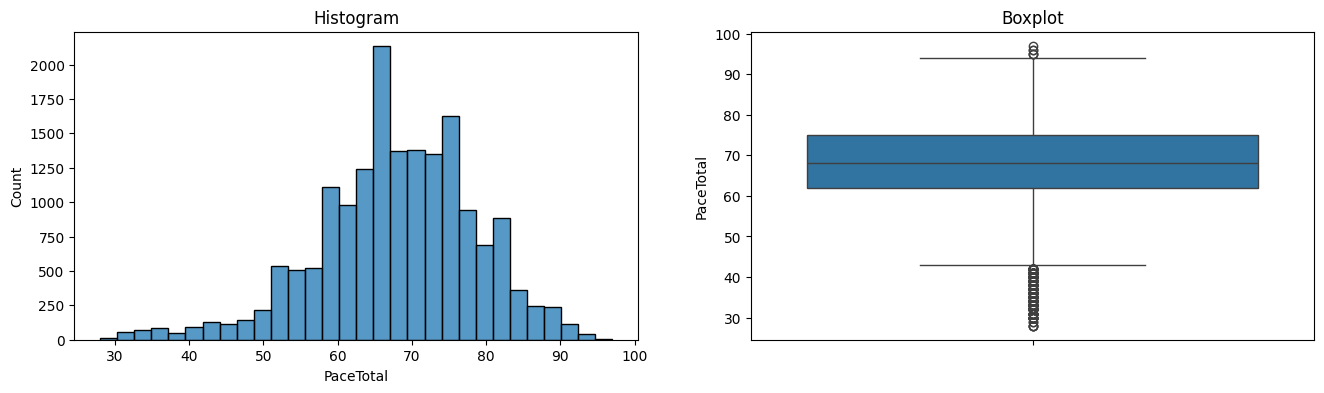

ShootingTotal - Before Capping


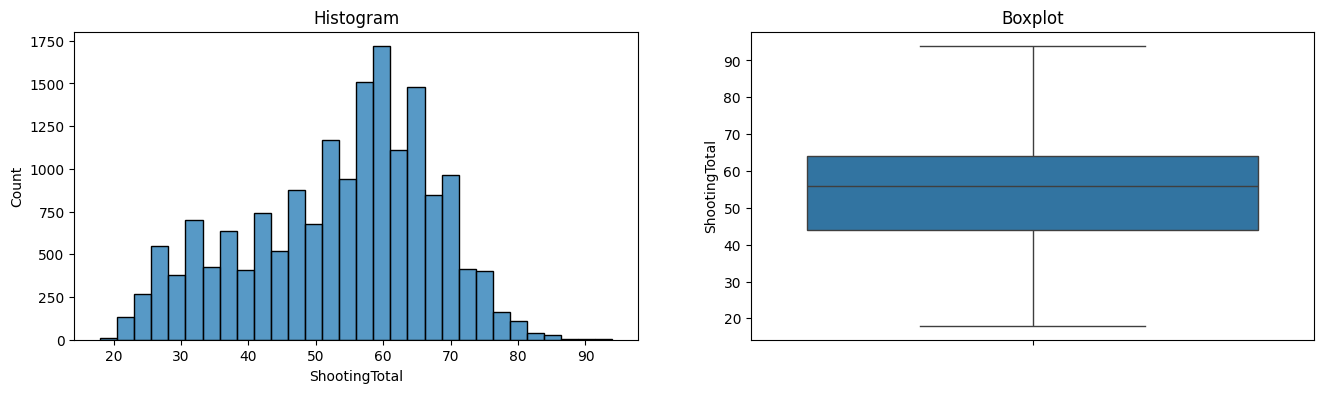


ShootingTotal - After Capping


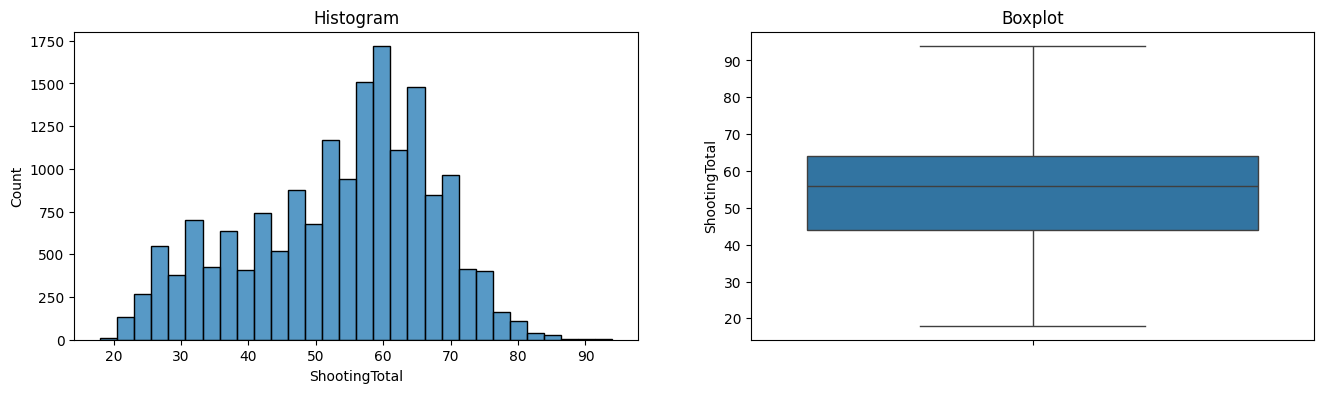

PassingTotal - Before Capping


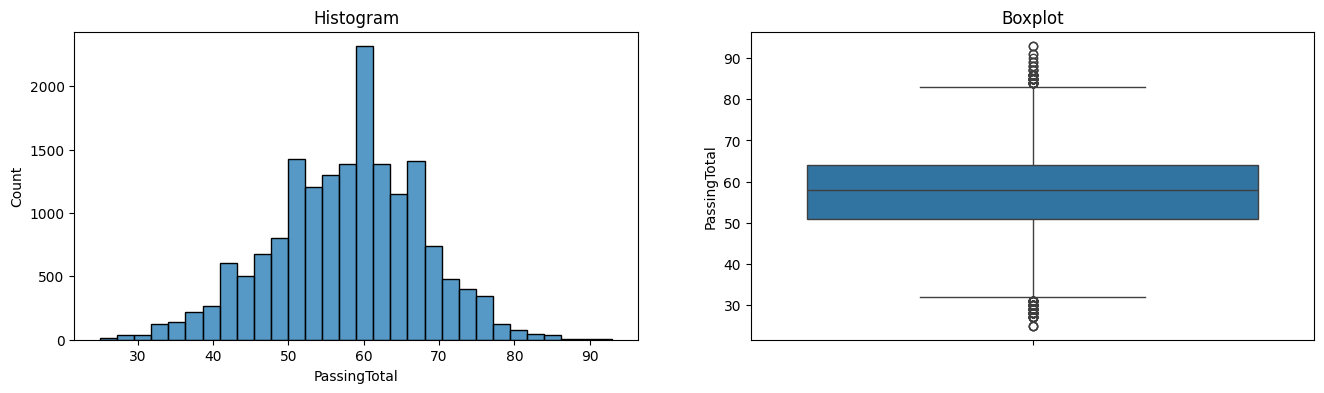


PassingTotal - After Capping


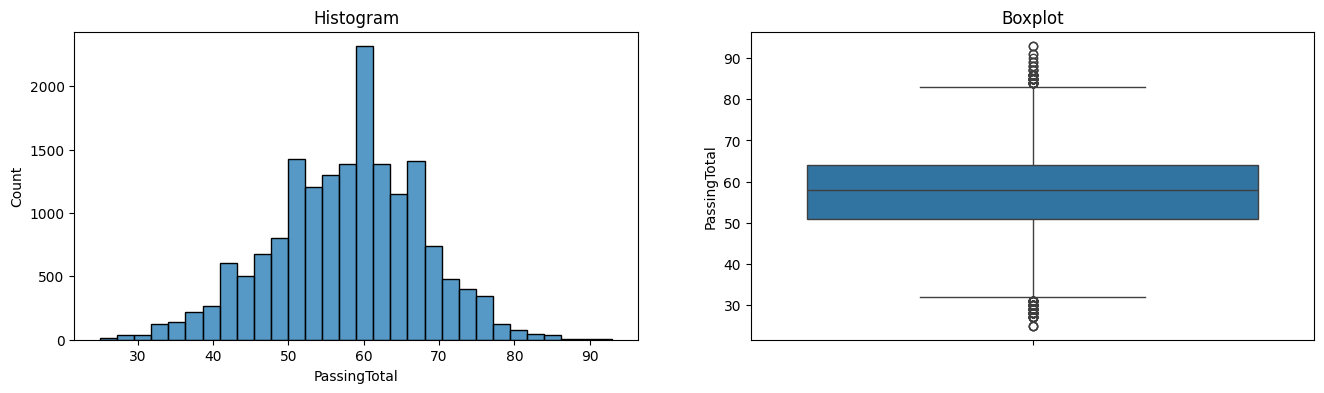

DribblingTotal - Before Capping


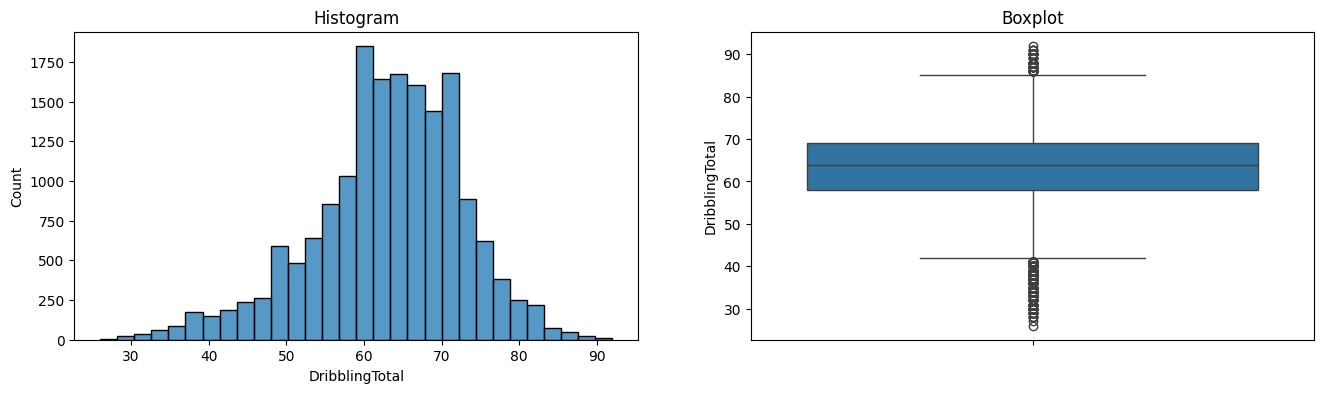


DribblingTotal - After Capping


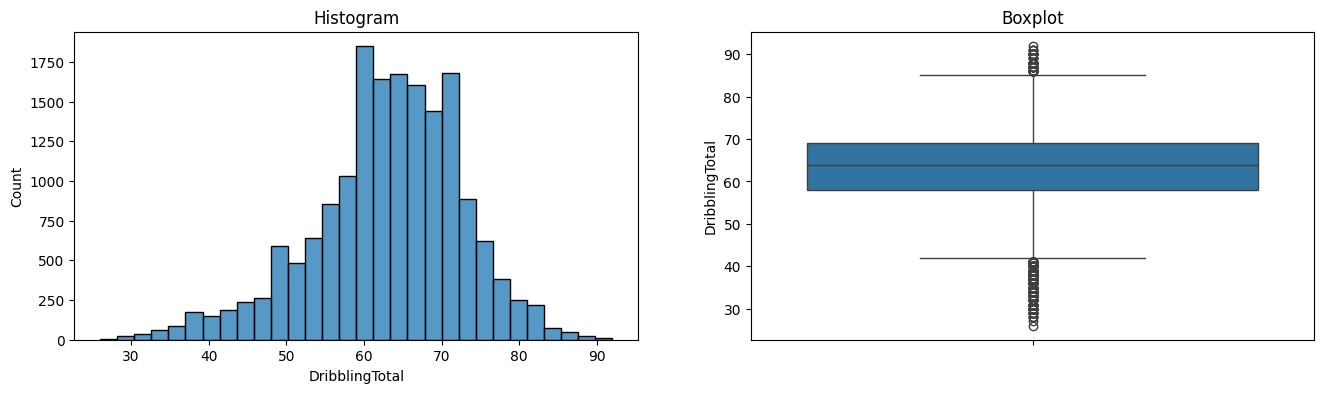

DefendingTotal - Before Capping


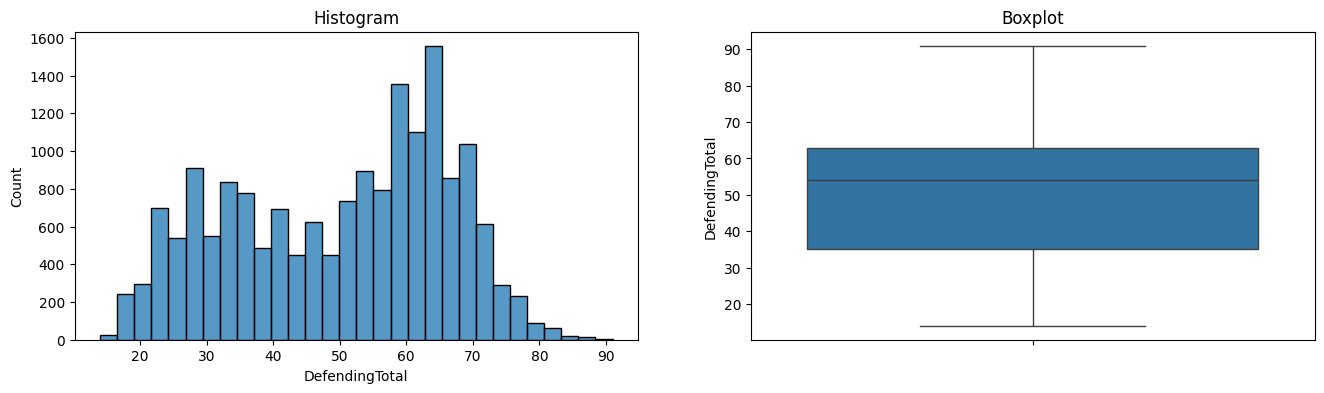


DefendingTotal - After Capping


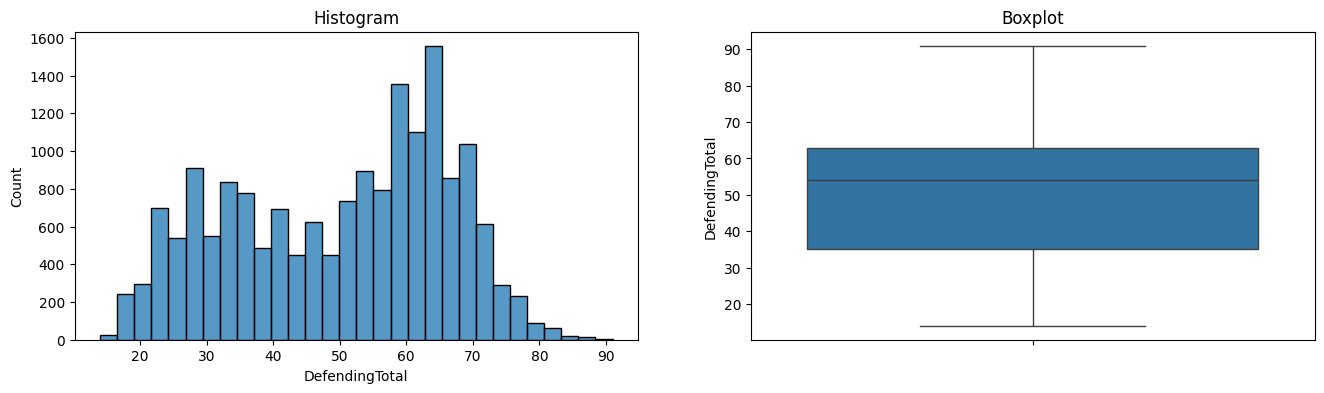

PhysicalityTotal - Before Capping


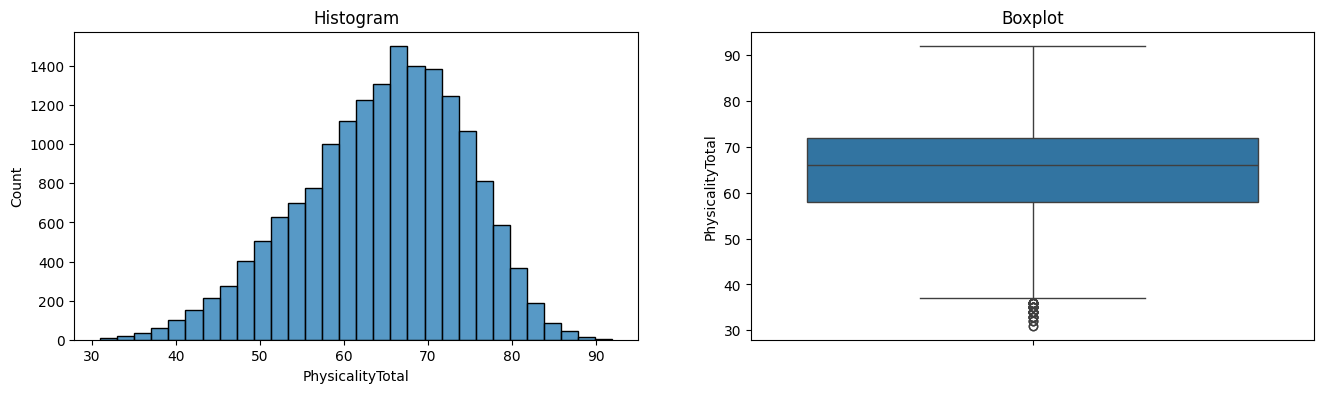


PhysicalityTotal - After Capping


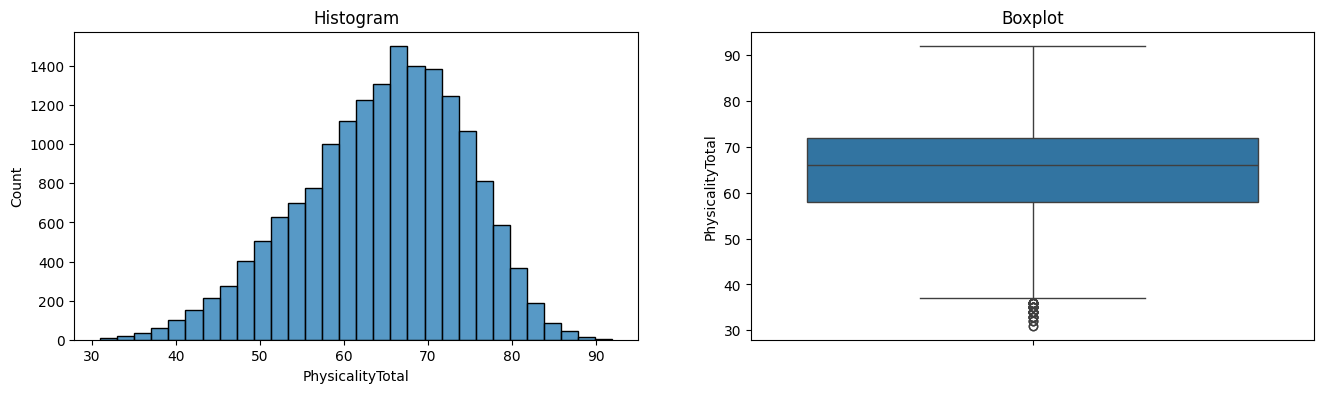

In [27]:
# Check the distribution before and after capping
for col in num_cols:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)

### Handling Missing Value

In [28]:
X_train.isnull().sum()

Name                 0
Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

In [29]:
X_test.isnull().sum()

Name                 0
Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

Dilakukan pengecekan missing value pada setiap set dan tidak ditemukan adanya missing value

### Split Between Numeric Columns and Categorical Columns

In [30]:
# Get numeric and categorical column

num_columns = X_train_capped.select_dtypes(include = np.number).columns.tolist()

cat_columns = X_train_capped.select_dtypes(include = ['object']).columns.tolist()

print('Numeric Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numeric Columns :  ['Age', 'Height', 'Weight', 'Price', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
Categorical Columns :  ['Name', 'AttackingWorkRate', 'DefensiveWorkRate']


In [31]:
#split numerical and categorical columns

X_train_num = X_train_capped[num_columns]
X_test_num = X_test_capped[num_columns]

X_train_cat = X_train_capped[cat_columns]
X_test_cat = X_test_capped[cat_columns]

X_train_num

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
9038,35,182,75,375000,56,67,67,67,37,57
3871,36,173,75,600000,44,70,74,70,42,55
662,29,183,83,6575000,41,44,62,64,80,81
13903,21,173,68,850000,64,28,45,59,63,43
16149,25,174,70,300000,66,43,56,63,52,62
...,...,...,...,...,...,...,...,...,...,...
9475,27,192,82,1000000,67,64,53,62,28,68
3714,28,183,76,1800000,65,41,48,47,71,77
7409,25,182,75,1100000,72,68,49,66,36,70
5787,22,187,78,2600000,74,51,59,64,68,76


### Feature Selection

In [32]:
X_train_capped

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
9038,Park Chu Young,35,182,75,375000,High,Medium,56,67,67,67,37,57
3871,F. Higuaín,36,173,75,600000,Medium,Low,44,70,74,70,42,55
662,Oriol Romeu,29,183,83,6575000,Low,High,41,44,62,64,80,81
13903,A. Seidu,21,173,68,850000,Medium,Medium,64,28,45,59,63,43
16149,Park Soo Il,25,174,70,300000,High,Medium,66,43,56,63,52,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9475,A. Jeremejeff,27,192,82,1000000,Medium,Low,67,64,53,62,28,68
3714,G. Ortíz,28,183,76,1800000,Low,High,65,41,48,47,71,77
7409,Claudio Silbeiro,25,182,75,1100000,Medium,Medium,72,68,49,66,36,70
5787,A. Andrade,22,187,78,2600000,High,Medium,74,51,59,64,68,76


Berdasarkan personal judgement, tidak ada kaitannya nama dengan rating pemain sepak bola. Bisa dibuktikan dengan nama Ali Ronaldo tidak ada kaitannya dengan nama sehebat Christiano Ronaldo.

In [33]:
#Drop column 'Name'

X_train_cat.drop('Name', axis = 1, inplace = True)
X_test_cat.drop('Name', axis = 1, inplace = True)
X_train_cat

/var/folders/80/9nz19ndj3130jx_8t5hgzwv80000gn/T/ipykernel_24548/3833121399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat.drop('Name', axis = 1, inplace = True)
/var/folders/80/9nz19ndj3130jx_8t5hgzwv80000gn/T/ipykernel_24548/3833121399.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat.drop('Name', axis = 1, inplace = True)


,AttackingWorkRate,DefensiveWorkRate
9038,High,Medium
3871,Medium,Low
662,Low,High
13903,Medium,Medium
16149,High,Medium
...,...,...
9475,Medium,Low
3714,Low,High
7409,Medium,Medium
5787,High,Medium


In [34]:
#get numerical and categorical columns yang udah fix

num_columns = X_train_num.columns.tolist()
cat_columns = X_train_cat.columns.tolist()

print('Num columns : ', num_columns)
print('Cat columns : ', cat_columns)

Num columns :  ['Age', 'Height', 'Weight', 'Price', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
Cat columns :  ['AttackingWorkRate', 'DefensiveWorkRate']


#### Correlation using kendall and pearson

In [35]:
from scipy.stats import kendalltau, pearsonr

# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})


,nama kolom,hasil
0,AttackingWorkRate,ada korelasi
1,DefensiveWorkRate,ada korelasi


In [36]:
import sklearn
sklearn.__version__

'1.6.1'

In [37]:
import feature_engine as f_e
f_e.__version__

'1.8.3'

In [38]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = pearsonr(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})


,nama kolom,hasil
0,Age,ada korelasi
1,Height,ada korelasi
2,Weight,ada korelasi
3,Price,ada korelasi
4,PaceTotal,ada korelasi
5,ShootingTotal,ada korelasi
6,PassingTotal,ada korelasi
7,DribblingTotal,ada korelasi
8,DefendingTotal,ada korelasi
9,PhysicalityTotal,ada korelasi


Dari hasil feature selection, maka semua feature yang mempunyai korelasi akan dimasukkan ke model.

### Feature Scaling

In [39]:
# Feature Scaling using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.5       , 0.52941176, 0.42622951, ..., 0.62121212, 0.2987013 ,
        0.42622951],
       [0.52631579, 0.35294118, 0.42622951, ..., 0.66666667, 0.36363636,
        0.39344262],
       [0.34210526, 0.54901961, 0.55737705, ..., 0.57575758, 0.85714286,
        0.81967213],
       ...,
       [0.23684211, 0.52941176, 0.42622951, ..., 0.60606061, 0.28571429,
        0.63934426],
       [0.15789474, 0.62745098, 0.47540984, ..., 0.57575758, 0.7012987 ,
        0.73770492],
       [0.10526316, 0.49019608, 0.47540984, ..., 0.54545455, 0.51948052,
        0.57377049]])

### Feature Encoding

In [40]:
X_train_cat

,AttackingWorkRate,DefensiveWorkRate
9038,High,Medium
3871,Medium,Low
662,Low,High
13903,Medium,Medium
16149,High,Medium
...,...,...
9475,Medium,Low
3714,Low,High
7409,Medium,Medium
5787,High,Medium


In [41]:
#Feature Encoding using Ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories = [['Low', 'Medium', 'High'], ['Low', 'Medium', 'High']])

X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_train_cat_encoded

array([[2., 1.],
       [1., 0.],
       [0., 2.],
       ...,
       [1., 1.],
       [2., 1.],
       [2., 1.]])

### Concate Between Numeric Columns and Categorical Columns

In [42]:
#Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis = 1)

X_train_final

array([[0.5       , 0.52941176, 0.42622951, ..., 0.42622951, 2.        ,
        1.        ],
       [0.52631579, 0.35294118, 0.42622951, ..., 0.39344262, 1.        ,
        0.        ],
       [0.34210526, 0.54901961, 0.55737705, ..., 0.81967213, 0.        ,
        2.        ],
       ...,
       [0.23684211, 0.52941176, 0.42622951, ..., 0.63934426, 1.        ,
        1.        ],
       [0.15789474, 0.62745098, 0.47540984, ..., 0.73770492, 2.        ,
        1.        ],
       [0.10526316, 0.49019608, 0.47540984, ..., 0.57377049, 2.        ,
        1.        ]])

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


num_pipe = Pipeline([('capping', winsoriser),
                     ('scaling', scaler)])

cat_pipe = Pipeline([('encoding', encoder)])

preprocessing = ColumnTransformer([('numerical', num_pipe, num_columns),
                                   ('categorical', cat_pipe, cat_columns)])


## 6 - Model Definition

>Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [44]:
# Training using Linear Regression

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR

svr = SVR()

model_lin_reg = LinearRegression()
model_elsaticz_net = ElasticNet()

In [45]:
X_train.shape

(17240, 13)

In [46]:
y_train.shape

(17240,)

In [47]:
linreg_pipe = Pipeline([('fe', preprocessing), ('linreg', model_lin_reg)])
elastic_pipe = Pipeline([('fe', preprocessing), ('elasticnet', model_elsaticz_net)])
svm_pipe = Pipeline([('fe', preprocessing), ('svr', svr)])


## 7 - Model Training

>Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [48]:
#Train the model

model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

In [49]:
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('fe',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('capping',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=3,
                                                                              missing_values='ignore',
                                                                              tail='both',
                                                                              variables=['Price'])),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'Price', 'PaceTotal',
                                                   'ShootingTotal',
                                                   'PassingTotal',
                                                   'DribblingTotal',
                                                   'DefendingTotal',
                                                   'PhysicalityTotal']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoding',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Low',
                                                                                               'Medium',
                                                                                               'High']]))]),
                                                  ['AttackingWorkRate',
                                                   'DefensiveWorkRate'])])),
                ('linreg', LinearRegression())])

In [50]:
svm_pipe.fit(X_train,y_train)

Pipeline(steps=[('fe',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('capping',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=3,
                                                                              missing_values='ignore',
                                                                              tail='both',
                                                                              variables=['Price'])),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'Price', 'PaceTotal',
                                                   'ShootingTotal',
                                                   'PassingTotal',
                                                   'DribblingTotal',
                                                   'DefendingTotal',
                                                   'PhysicalityTotal']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoding',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Low',
                                                                                               'Medium',
                                                                                               'High']]))]),
                                                  ['AttackingWorkRate',
                                                   'DefensiveWorkRate'])])),
                ('svr', SVR())])

## 8 - Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.


In [51]:
#Lihat hasil prediksi

y_pred_train = linreg_pipe.predict(X_train)

y_pred_test = linreg_pipe.predict(X_test)

y_pred_train

array([65.64865915, 67.21373973, 79.51303985, ..., 65.25561512,
       69.24591185, 62.86837373])

In [52]:
#Lihat hasil prediksi

y_pred_train = model_lin_reg.predict(X_train_final)

y_pred_test = model_lin_reg.predict(X_test_final)

y_pred_train

array([65.64865915, 67.21373973, 79.51303985, ..., 65.25561512,
       69.24591185, 62.86837373])

In [53]:
#Lihat hasil prediksi

y_pred_train = svm_pipe.predict(X_train)

y_pred_test = svm_pipe.predict(X_test)

y_pred_train

array([66.14313396, 68.45073117, 77.90020431, ..., 65.85767346,
       69.29318522, 62.11334834])

In [54]:
y_train

9038     66
3871     71
662      78
13903    62
16149    59
         ..
9475     66
3714     71
7409     67
5787     69
14155    62
Name: Rating, Length: 17240, dtype: int64

In [55]:
#Model Evaluation using MAE

from sklearn.metrics import mean_absolute_error

print('Error - Train set : ', mean_absolute_error(y_train, y_pred_train))

Error - Train set :  0.9132176085254169


In [56]:
#Model Evaluation using MAE

from sklearn.metrics import mean_absolute_error

print('Error - Train set : ', mean_absolute_error(y_train, y_pred_train))

Error - Train set :  0.9132176085254169


In [57]:
print('Error - Test set: ', mean_absolute_error(y_test, y_pred_test))

Error - Test set:  0.9720974539732882


## 9 - Model Saving

> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

In [58]:
#Save the files

import pickle
import json

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)

with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('linreg.pkl', 'wb') as file_5:
  pickle.dump(model_lin_reg, file_5)

In [59]:
svm_pipe

Pipeline(steps=[('fe',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('capping',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=3,
                                                                              missing_values='ignore',
                                                                              tail='both',
                                                                              variables=['Price'])),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'Price', 'PaceTotal',
                                                   'ShootingTotal',
                                                   'PassingTotal',
                                                   'DribblingTotal',
                                                   'DefendingTotal',
                                                   'PhysicalityTotal']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoding',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Low',
                                                                                               'Medium',
                                                                                               'High']]))]),
                                                  ['AttackingWorkRate',
                                                   'DefensiveWorkRate'])])),
                ('svr', SVR())])

In [60]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(svm_pipe, file)

In [63]:
with open('model.pkl', 'rb') as file_5:
  model = pickle.load(file_5)

data_inf = {
    'Name': 'Ghiffari',
    'Age' : 50,
    'Height' : 190,
    'Weight' : 80,
    'Price' : 1900000,
    'AttackingWorkRate': 'High',
    'DefensiveWorkRate': 'High',
    'PaceTotal': 50,
    'ShootingTotal': 100,
    'PassingTotal': 100,
    'DribblingTotal': 100,
    'DefendingTotal': 100,
    'PhysicalityTotal': 60
}

data_inf = pd.DataFrame([data_inf])
data_inf

model.predict(data_inf)[0]

77.27524006565672

In [64]:
sklearn.__version__

'1.6.1'

## 10 - Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.